<h3>Question 1</h3>

<h4>Analytically</h4>

In [1]:
from math import log

In [2]:
thickness = 1 # in mm
mm_to_m_conversion = 1e-3 # Converting 1mm to 0.001m
no_of_folds = log(8848/(1 * mm_to_m_conversion), 2) # The formula boils down to this, so I just wrote it as derived

In [3]:
print(no_of_folds)

23.076919954896795


<h4>Programmatically</h4>

In [4]:
# Defining the variables as given in the question to calculate using code rather than just a mathematical derivation
running_height = thickness * mm_to_m_conversion
maximum_height = 8848
folds = [0]
heights = [running_height]
counter = 0

# The following loop checks the current height of the paper and compares it to the target height of 8,848m and stops
# when the height is reached. The counter is keeping track of the number of folds.
while running_height <= maximum_height:
    
    running_height = 2 * running_height
    counter += 1
    
    folds.append(counter)
    heights.append(running_height)

print(folds[-1])

24


In [5]:
import matplotlib.pyplot as plt

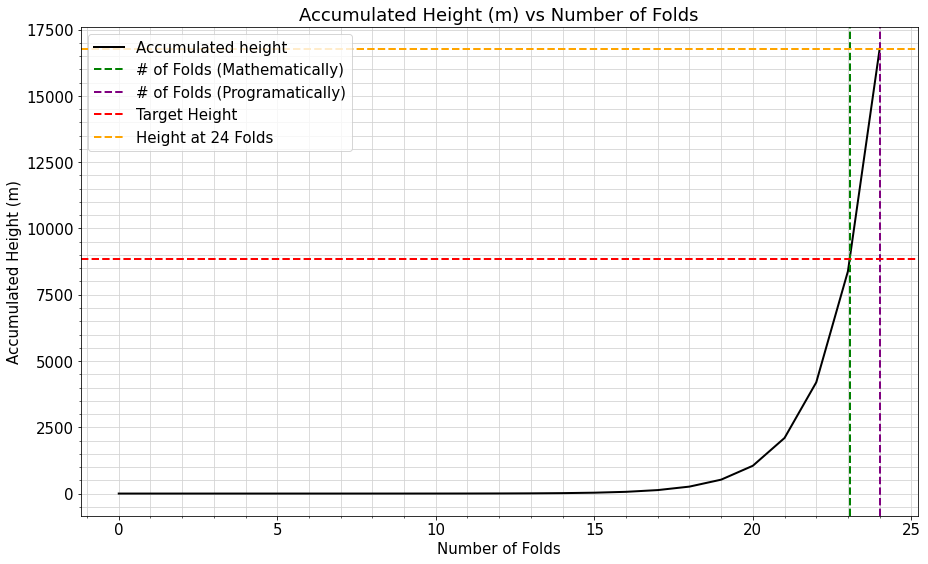

In [6]:
# The following plotting code was used over and over again, but I changed some of the variables for each graph
# Moving on with my assignments, I will create generic functions and write comments about them at the top and use 
# them in all my code, so that I can minimize my explanations.

# This code and other codes (with some variations) is plotting 1 graph and drawing 2 vertical lines at 23 and 24
# and 2 horizontal lines (one at the height of 23 folds and one at the height of 24 folds).
graph = plt.figure(figsize = (15, 9))
plt.rcParams.update({'font.size': 15}) #setting font size to a larger one
plt.plot(folds, heights, color = "black", linewidth = 2, label = "Accumulated height")
# folds calculated mathematically
plt.axvline(x = no_of_folds, color = "green", linestyle = "--", linewidth = 2, label = "# of Folds (Mathematically)")
# folds calculated in code
plt.axvline(x = folds[-1], color = "purple", linestyle = "--", linewidth = 2, label = "# of Folds (Programatically)")
# Target height
plt.axhline(y = maximum_height, color = "red", linestyle = "--", linewidth = 2, label = "Target Height")
# Height at 24 folds
plt.axhline(y = heights[-1], color = "orange", linestyle = "--", linewidth = 2, label = "Height at 24 Folds")
# This code is to add a title, a grid (showing major and minor lines), giving the x and y axes labels, and showing
# the legend
plt.title("Accumulated Height (m) vs Number of Folds")
plt.grid(True, which = "both", color = "lightgrey", zorder = 0)
plt.minorticks_on()
plt.xlabel("Number of Folds")
plt.ylabel("Accumulated Height (m)")
plt.legend(loc= "best") 
plt.show() # indicating my final graph. If I decide to add a plot to the graph later, I can save that step for later

<h3>Question 2</h3>

<h4>Mathematically</h4>

In [7]:
from math import e # importing the Euler number to use it for log_e as derived in the report

In [8]:
t_half_full = -10 * log (0.5, e) # equation from report that solves for the time at which the tank is half full

In [9]:
print(t_half_full)

6.931471805599453


<h4>Programmatically</h4>

In [10]:
# array and arange are for numpy arrays(types of lists) and arange is for creating ranges from a to b with a step size
from numpy import array, arange, interp
from numpy import exp

In [11]:
# defining values as given in the question
initial_volume = 10
rate_of_decay = 0.1
times = array(arange(0, 101, 0.01))
# initializing a list to append my volumes to it.
volumes = []

In [12]:
# the following "for" loop runs through the values in the "times" array and adds the value of the volume list at 
# that time. The formula used in the loop is derived (in the report) and it returns the volume at time t
for t in times:
    
    volume = initial_volume * exp(-1 * rate_of_decay * t)
    volumes.append(volume)

# I was initially getting an error so I looked it up on stackexchange and the  x values must be in ascending order 
# for the interp function to work, so I reversed both. The interp function (also looked it up), finds the x value
# from two lists and returns the value of y at that time (also an explanation for why I have volumes as x and times)
# as y.
print(interp(5.0, volumes[::-1], times[::-1])) 

6.931472433265468


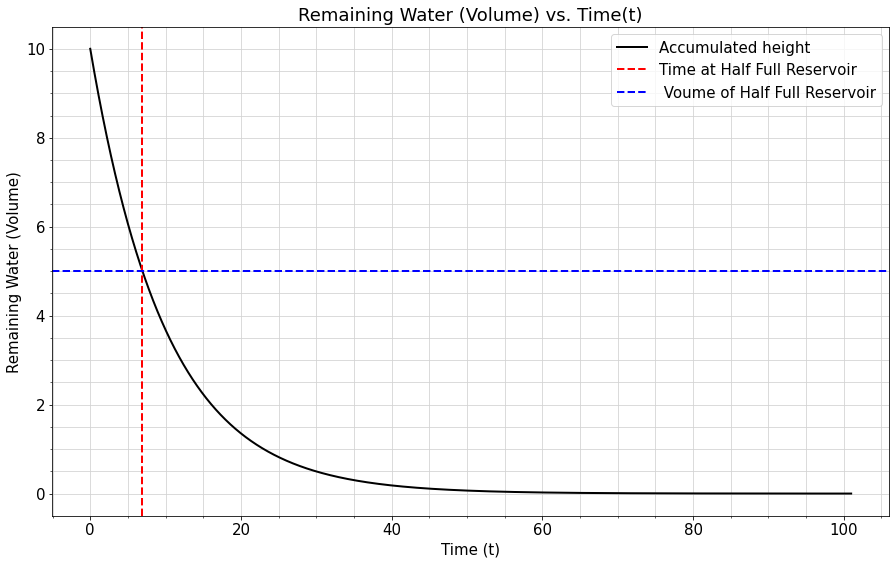

In [13]:
# I previously explained the 
graph = plt.figure(figsize = (15, 9))
plt.rcParams.update({'font.size': 15}) #setting font size to a larger one
plt.plot(times, volumes, color = "black", linewidth = 2, label = "Accumulated height")
# folds calculated mathematically
plt.axvline(x = 6.93, color = "red", linestyle = "--", linewidth = 2, label = "Time at Half Full Reservoir")
plt.axhline(y = interp(6.93, times, volumes), color = "blue", linestyle = "--", linewidth = 2, label = " Voume of Half Full Reservoir")
# This code is to add a title, a grid (showing major and minor lines), giving the x and y axes labels, and showing
# the legend
plt.title("Remaining Water (Volume) vs. Time(t)")
plt.grid(True, which = "both", color = "lightgrey", zorder = 0)
plt.minorticks_on()
plt.xlabel("Time (t)")
plt.ylabel("Remaining Water (Volume)")
plt.legend(loc= "best")
plt.show()

<h3>Question 3</h3>

In [14]:
years = [1, 2, 3, 4, 5] # list of years to be calculated
principal = 100 # initial investment
interest = 0.05 # annual interest
compounding_frequency = 1 # annual compounding
final_amounts_compounded = [] # initializing the list to add the compounded interest of each year to it

In [15]:
# the "for" loop runs through the range of the length of the years list (which is 5), and then the amount formula
# is the compounding interest formula just written in code.

# I input the amounts as dicts because it makes it easier to read when printed, with each year attached to its value
for i in range(len(years)):
    
    amount = principal * (1 + interest/compounding_frequency) ** (compounding_frequency * years[i])
    final_amounts_compounded.append({ years[i] : round(amount) })
    
print(final_amounts_compounded)

[{1: 105}, {2: 110}, {3: 116}, {4: 122}, {5: 128}]


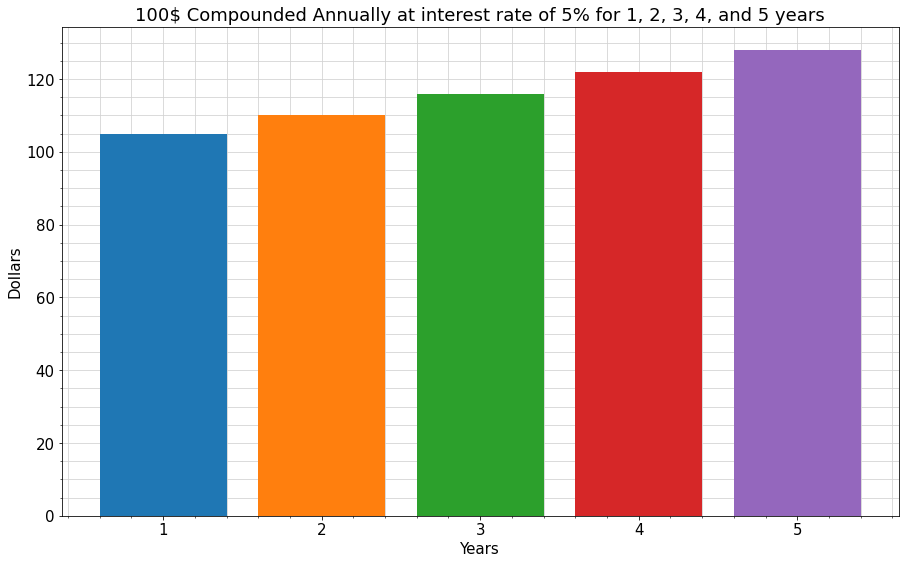

In [16]:
plt.figure(figsize = (15, 9))
plt.grid(True, which = "both", color = "lightgrey", zorder = 0)
plt.minorticks_on()   
# This code is to add a title, a grid (showing major and minor lines), giving the x and y axes labels
plt.xlabel("Years")
plt.ylabel("Dollars")
plt.title("100$ Compounded Annually at interest rate of 5% for 1, 2, 3, 4, and 5 years")
# This loop runs through the years list and graphs a bar graph for each yeas. The x-axis is the dictionary's keys
# and the y-axis is the dictionary's values because that's how I had them saved previously. "zorder" pushes the
# grid to the back

for i in range(len(years)):
    
    plt.bar(final_amounts_compounded[i].keys(), final_amounts_compounded[i].values(), zorder = 3)
    
# plt.show()'s location is here because I graphed multiple bars and I want them all on the same plot.
plt.rcParams.update({'font.size': 15}) #setting font size to a larger one
plt.show()

In [17]:
# This is an additional section to showcase how the 100$ can grow faster. I defined the array to span to 100
years_100 = array(arange(0, 101, 1))
amounts_compounded_over_100_years = []

In [18]:
# the "for" loop runs through the range of the length of the years list (which is 100), and then the amount formula
# is the compounding interest formula just written in code.
for i in range(len(years_100)):
    
    amount = principal * (1 + interest/compounding_frequency) ** (compounding_frequency * years_100[i])
    amounts_compounded_over_100_years.append({ years_100[i] : round(amount) })

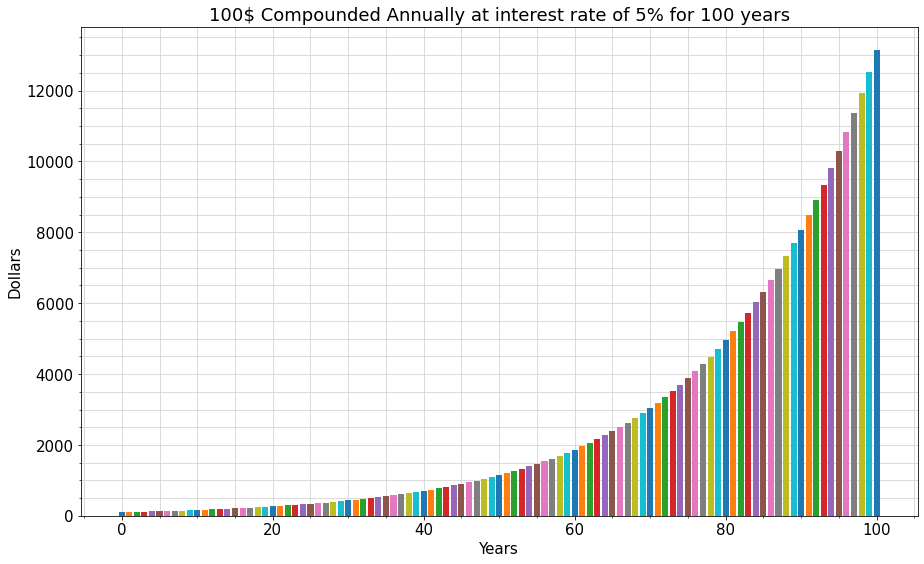

In [19]:
plt.figure(figsize = (15, 9))
# This code is to add a title, a grid (showing major and minor lines), giving the x and y axes labels
plt.grid(True, which = "both", color = "lightgrey", zorder = 0)
plt.minorticks_on() 
plt.xlabel("Years")
plt.ylabel("Dollars")
plt.title("100$ Compounded Annually at interest rate of 5% for 100 years")

for i in range(len(years_100)):
    
    plt.bar(amounts_compounded_over_100_years[i].keys(), amounts_compounded_over_100_years[i].values(), zorder = 3)
# plt.show()'s location is here because I graphed multiple bars and I want them all on the same plot.
plt.rcParams.update({'font.size': 15}) #setting font size to a larger one
plt.show()

<h3>Question 4</h3>

In [20]:
repayment_years = [1, 2, 3] # Setting the number of repayment years in a list for easier manipulation
# Defining some variables (parameters of the problem) for the Amortization Calculation Formula
loan = 20000
interest_rate = 0.01
compounding_frequency_of_debt = 12
# Crunching the (1 + r)^n term in a list because it becomes tedious to type into python later
one_plus_r_to_the_n_term = [(1 + interest_rate) ** (compounding_frequency_of_debt * i) for i in repayment_years]
monthly_payments = [] # Creating an empty list to append the values to later

In [21]:
# Looping over the calculation of the (1 + r)^n list (previously calculated) to multiply by the parameters
# I input the amounts as dicts because it makes it easier to read when printed, with each year attached to its 
# value 
for i in range(len(one_plus_r_to_the_n_term)):
    
    payment = (loan * interest_rate * one_plus_r_to_the_n_term[i]) / (one_plus_r_to_the_n_term[i] - 1)
    monthly_payments.append({i + 1: round(payment)})

print(monthly_payments)

[{1: 1777}, {2: 941}, {3: 664}]


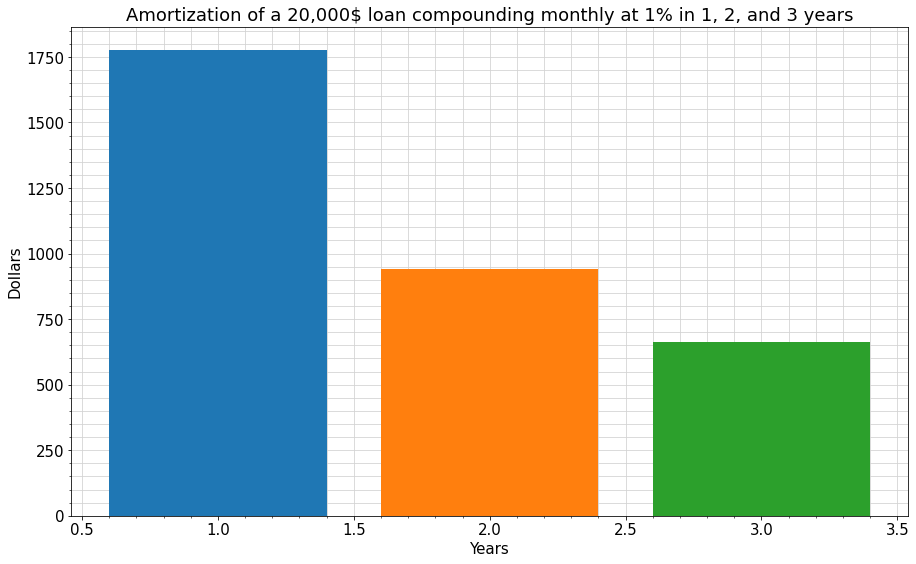

In [22]:
plt.figure(figsize = (15, 9))
plt.grid(True, which = "both", color = "lightgrey", zorder = 0)
plt.minorticks_on()
plt.xlabel("Years")
plt.ylabel("Dollars")
plt.title("Amortization of a 20,000$ loan compounding monthly at 1% in 1, 2, and 3 years")

for i in range(len(repayment_years)):
    
    plt.bar(monthly_payments[i].keys(), monthly_payments[i].values(), zorder = 3)

plt.rcParams.update({'font.size': 15}) #setting font size to a larger one
plt.show()

In [23]:
twenty_years = array(arange(1, 21, 1))
monthly_payments_twenty = []

In [24]:
one_plus_r_to_the_n_term = [(1 + interest_rate) ** (compounding_frequency_of_debt * i) for i in twenty_years]
# Looping over the calculation of the (1 + r)^n list (previously calculated) to multiply by the parameters
for i in range(len(one_plus_r_to_the_n_term)):
    
    payment = (loan * interest_rate * one_plus_r_to_the_n_term[i]) / (one_plus_r_to_the_n_term[i] - 1)
    monthly_payments_twenty.append({i + 1: round(payment)})

print(monthly_payments_twenty)

[{1: 1777}, {2: 941}, {3: 664}, {4: 527}, {5: 445}, {6: 391}, {7: 353}, {8: 325}, {9: 304}, {10: 287}, {11: 274}, {12: 263}, {13: 254}, {14: 246}, {15: 240}, {16: 235}, {17: 230}, {18: 226}, {19: 223}, {20: 220}]


In [25]:
principals =[]
interests = []

# the for loop loops over the length of the twenty_years list so I can get 20 iterations (arbitrary, I could have
# put 20). Then, as asked, I appended the rounded values to the nearest dollar.

for i in range(len(twenty_years)):
    
    pymt = monthly_payments_twenty[i][i+1]  #the keys and i are different by 1, the first [] calls the list item and the second [] calls the dict key
    interest = (pymt * (i+1) * 12) - loan
    interests.append(round(interest/((i+1)*12)))
    principals.append(round(pymt-interest/((i+1)*12)))

print(interests)
print(principals)

[110, 108, 108, 110, 112, 113, 115, 117, 119, 120, 122, 124, 126, 127, 129, 131, 132, 133, 135, 137]
[1667, 833, 556, 417, 333, 278, 238, 208, 185, 167, 152, 139, 128, 119, 111, 104, 98, 93, 88, 83]


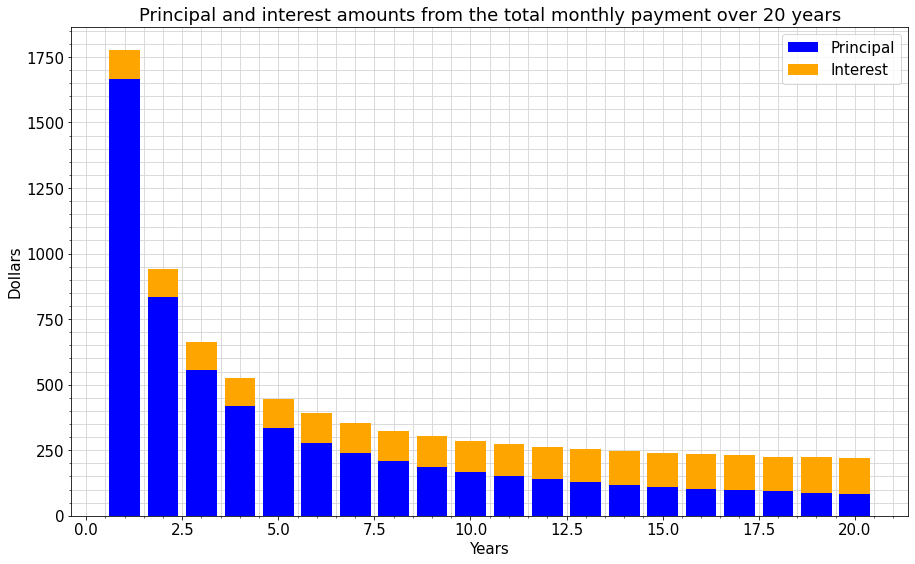

In [26]:
plt.figure(figsize = (15, 9))
plt.grid(True, which = "both", color = "lightgrey", zorder = 0)
plt.xlabel("Years")
plt.ylabel("Dollars")
plt.minorticks_on()
plt.bar(twenty_years, principals, color = "blue", label = "Principal", zorder = 3)
# I looked up the bottom variable so I can split the bar into principal and interest
plt.bar(twenty_years, interests, color = "orange", bottom = principals, label = "Interest", zorder = 3)
plt.title("Principal and interest amounts from the total monthly payment over 20 years")
plt.legend()
plt.rcParams.update({'font.size': 15}) #setting font size to a larger one
plt.show()

In [27]:
totals_interest = []
totals_principal = []


for year in twenty_years:
    # year - 1 because I am iterating from 1, and the list has the values stored from 0 (adjusting the index)
    total_interest = interests[year - 1] * year * 12 # year * 12 is to find the total amount of months
    totals_interest.append(total_interest)
    
    total_principal = (principals[year - 1] * year * 12)
    totals_principal.append(total_principal)

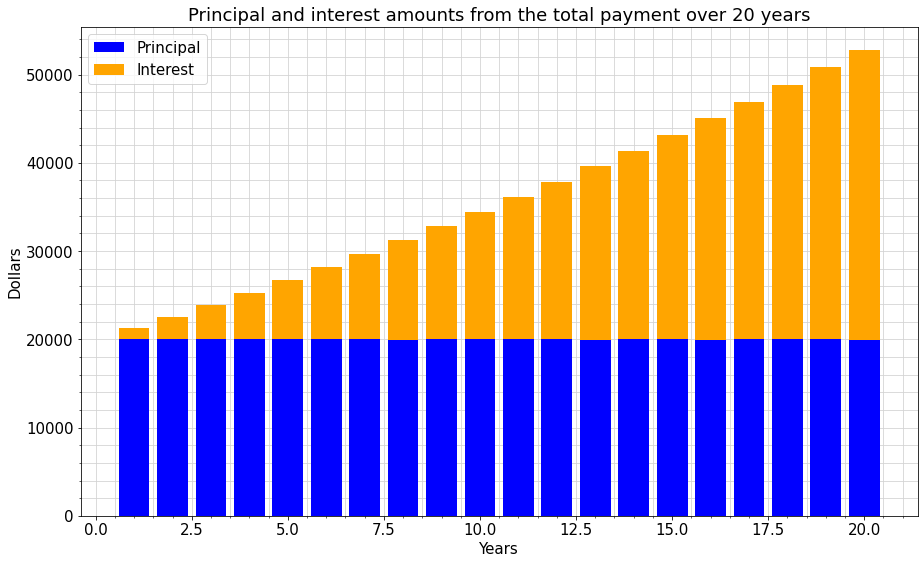

In [28]:
plt.figure(figsize = (15, 9))
plt.grid(True, which = "both", color = "lightgrey", zorder = 0)
plt.xlabel("Years")
plt.ylabel("Dollars")
plt.minorticks_on()
plt.bar(twenty_years, totals_principal, color = "blue", label = "Principal", zorder = 3)
plt.bar(twenty_years, totals_interest, color = "orange", bottom = totals_principal, label = "Interest", zorder = 3)
plt.title("Principal and interest amounts from the total payment over 20 years")
plt.legend()
plt.rcParams.update({'font.size': 15}) #setting font size to a larger one
plt.show()

<h3>Question 5</h3>

In [29]:
from numpy import array, exp
# Given values
initial_investment = 100000
initial_customers = 100
profit_per_customer = 10
customer_growth_rate = 0.01
# A time array to iterate over
t = array(range(0,1000))
profit_returned = 0
profit_to_date = []

In [30]:
growing_profits = [10 * 100 * exp(customer_growth_rate * i) for i in t] 
# the inline for loop to get a list of the number of customers x profit

In [31]:
# this "for" loop acts as the sum as derived in the report, because the accumulated profits at day 2 are day1 + day2
# as showcased in profit_returned += profit. Then the if statement compares the profit returned to the initial
# investment. when the profit returned is greater than or equal to initial investment, it stops. Setting the if
# to == would cause an issue because the numbers are not exact. So this numbe is whithin some accuracy.
for profit in growing_profits:
    
    profit_returned += profit
    profit_to_date.append(profit_returned)
    
    if profit_returned >= initial_investment:
        
        break
        
    else:
        
        continue
# at every iteration, it appends the total profits to this point. how many values are in that list is how many days
# it took it to reach the initial investment. Hence, len(profit_to_date)
breakeven_day = len(profit_to_date)
print(breakeven_day)

70


In [32]:
import matplotlib.pyplot as plt

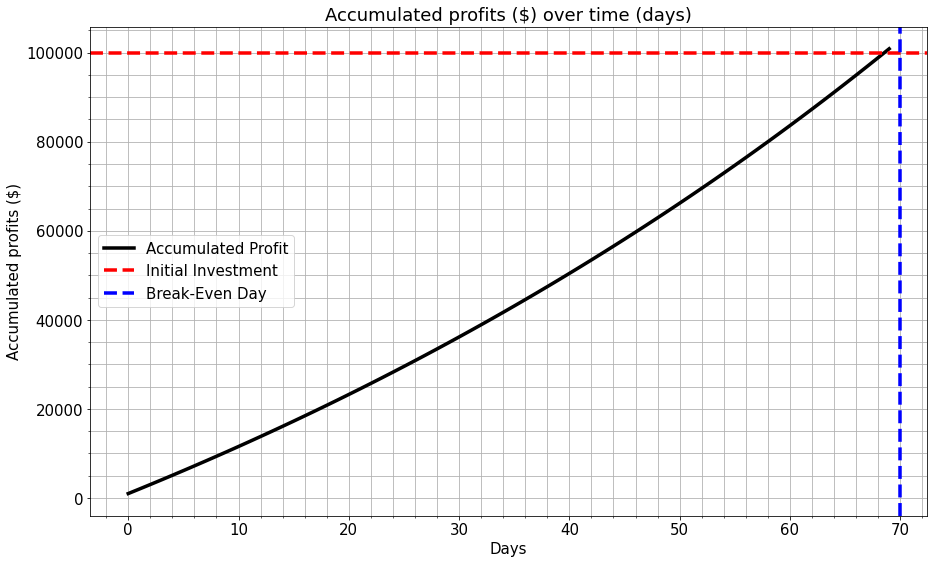

In [33]:
graph = plt.figure(figsize = (15, 9))
plt.plot(array(range(0, breakeven_day)), profit_to_date, label = "Accumulated Profit", color = "black", linewidth = 3.5)
plt.axhline(y = initial_investment, color = "red", linestyle = "--", label = "Initial Investment", linewidth = 3.5)
plt.axvline(x = breakeven_day, color = "blue", label = "Break-Even Day",linestyle = "--", linewidth = 3.5)
plt.title("Accumulated profits ($) over time (days)")
plt.xlabel("Days")
plt.ylabel("Accumulated profits ($)")
plt.grid(True, which = "major")
plt.grid(True, which = "minor")
plt.minorticks_on()
plt.legend()
plt.rcParams.update({'font.size': 15}) #setting font size to a larger one
plt.show()

<h3>Question 6</h3>

In [34]:
import pandas as pd

In [35]:
# reads the excel file and sets the date column as the index
xls_file = pd.read_excel("ebola_download.xls", index_col = "Date")
print(xls_file)

            Cases  Death   Diff  Noofdays
Date                                     
2014-03-22     49     29      2         1
2014-03-24     86     59      1         3
2014-03-25     86     60      1         4
2014-03-26     86     62      1         5
2014-03-27    111     72      1         6
...           ...    ...    ...       ...
2014-11-02  13014   5191      2       226
2014-11-04  13200   5275      5       228
2014-11-09  14068   5496      2       233
2014-11-11  14383   5492      1       235
2014-11-12  14413   5498 -41955       236

[80 rows x 4 columns]


In [36]:
# creates a range of dates (daily) from the minimum to the maximum date of the dataset
indices = pd.date_range(xls_file.index.min(), xls_file.index.max(), freq = "D")
print(indices)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-11-03', '2014-11-04', '2014-11-05', '2014-11-06',
               '2014-11-07', '2014-11-08', '2014-11-09', '2014-11-10',
               '2014-11-11', '2014-11-12'],
              dtype='datetime64[ns]', length=236, freq='D')


In [37]:
# I did not know about this formula, I looked it up on stackexchange. I usually set_index, but it did not work
# This formula generates a new index set for the dataframe and keeps the previous values and by default fills
# the new indices with NaN. Pretty cool
xls_file = xls_file.reindex(indices)
print(xls_file)

              Cases   Death     Diff  Noofdays
2014-03-22     49.0    29.0      2.0       1.0
2014-03-23      NaN     NaN      NaN       NaN
2014-03-24     86.0    59.0      1.0       3.0
2014-03-25     86.0    60.0      1.0       4.0
2014-03-26     86.0    62.0      1.0       5.0
...             ...     ...      ...       ...
2014-11-08      NaN     NaN      NaN       NaN
2014-11-09  14068.0  5496.0      2.0     233.0
2014-11-10      NaN     NaN      NaN       NaN
2014-11-11  14383.0  5492.0      1.0     235.0
2014-11-12  14413.0  5498.0 -41955.0     236.0

[236 rows x 4 columns]


In [38]:
# I removed the Diff and Noofdays column because I don't need them. I will be interpolating the values in the next
# step
xls_file = xls_file.drop(columns = ["Diff", "Noofdays"])
print(xls_file)

              Cases   Death
2014-03-22     49.0    29.0
2014-03-23      NaN     NaN
2014-03-24     86.0    59.0
2014-03-25     86.0    60.0
2014-03-26     86.0    62.0
...             ...     ...
2014-11-08      NaN     NaN
2014-11-09  14068.0  5496.0
2014-11-10      NaN     NaN
2014-11-11  14383.0  5492.0
2014-11-12  14413.0  5498.0

[236 rows x 2 columns]


In [39]:
# Also looked this up on stackexchange to fill in the values linearly of the NaN values. Again, it automatically
# fills the NaN values.
xls_file = xls_file.interpolate(method = "linear")
print(xls_file)

              Cases   Death
2014-03-22     49.0    29.0
2014-03-23     67.5    44.0
2014-03-24     86.0    59.0
2014-03-25     86.0    60.0
2014-03-26     86.0    62.0
...             ...     ...
2014-11-08  13894.4  5451.8
2014-11-09  14068.0  5496.0
2014-11-10  14225.5  5494.0
2014-11-11  14383.0  5492.0
2014-11-12  14413.0  5498.0

[236 rows x 2 columns]


In [40]:
cases_threshold = []
deaths_threshold = []
target_values = [100, 500, 1000, 2000, 5000]

# the "for" loop runs through the target values list
for value in target_values:
    
    # this is a function enabled by pandas where it selects all the values >= values, and then I use iloc to find
    # the first number in that section of the frame
    target_cases = xls_file[xls_file["Cases"] >= value].iloc[0]
    cases_threshold.append(target_cases[0])
    
    target_deaths = xls_file[xls_file["Death"] >= value].iloc[0]
    deaths_threshold.append(target_deaths[1])

In [41]:
# I also looked up isin. It loops over the values of the lists and finds the numbers associated with it
# the .index is used to find the dates associated with the values
cases_threshold_dates = xls_file[xls_file["Cases"].isin(cases_threshold)].index
deaths_threshold_dates = xls_file[xls_file["Death"].isin(deaths_threshold)].index

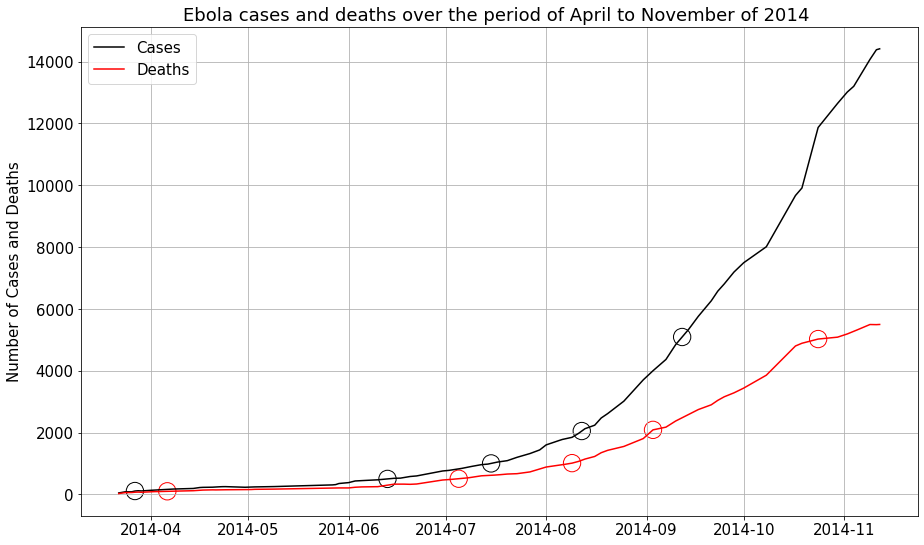

In [42]:
graph = plt.figure(figsize = (15, 9))
plt.plot(xls_file.index, xls_file["Cases"], label = "Cases", color = "black")
plt.plot(xls_file.index, xls_file["Death"], label = "Deaths", color = "red")
plt.scatter(cases_threshold_dates, cases_threshold, c = "None", edgecolors = "black", s = 300)
plt.scatter(deaths_threshold_dates, deaths_threshold, c = "None", edgecolors = "red", s = 300)
plt.ylabel("Number of Cases and Deaths")
plt.title("Ebola cases and deaths over the period of April to November of 2014 ")
plt.grid(True, which = "major")
plt.legend()
plt.rcParams.update({'font.size': 15}) #setting font size to a larger one
plt.show()

In [43]:
cases = []
deaths = []
i = 0
# loops over the target values 100, 500, 1000, 2000, and 5000 to find the associated date. The issoformat() function
# is to only post the date without the time which is defaulted at 00:00:00
for target in target_values:
    
    cases.append({target : cases_threshold_dates[i].date().isoformat()})
    deaths.append({target: deaths_threshold_dates[i].date().isoformat()})
    i += 1

In [44]:
print(cases)

[{100: '2014-03-27'}, {500: '2014-06-13'}, {1000: '2014-07-15'}, {2000: '2014-08-12'}, {5000: '2014-09-12'}]


In [45]:
print(deaths)

[{100: '2014-04-06'}, {500: '2014-07-05'}, {1000: '2014-08-09'}, {2000: '2014-09-03'}, {5000: '2014-10-24'}]


In [46]:
# I also looked that up on stackexchange. The function extracts the values from the dictionary which is stored
# in the list. [0] is assigned so that it picks up the dates.
cases_df = pd.DataFrame(data = [list(c.values())[0] for c in cases], index = target_values, columns = ["Cases"])
deaths_df = pd.DataFrame(data = [list(d.values())[0] for d in deaths], index = target_values, columns = ["Deaths"])

In [47]:
# sticks the dataframes together
table = pd.concat([cases_df, deaths_df], axis = 1)

In [48]:
table

,Cases,Deaths
100,2014-03-27,2014-04-06
500,2014-06-13,2014-07-05
1000,2014-07-15,2014-08-09
2000,2014-08-12,2014-09-03
5000,2014-09-12,2014-10-24


<h3>Question 7</h3>

In [49]:
print(xls_file)

              Cases   Death
2014-03-22     49.0    29.0
2014-03-23     67.5    44.0
2014-03-24     86.0    59.0
2014-03-25     86.0    60.0
2014-03-26     86.0    62.0
...             ...     ...
2014-11-08  13894.4  5451.8
2014-11-09  14068.0  5496.0
2014-11-10  14225.5  5494.0
2014-11-11  14383.0  5492.0
2014-11-12  14413.0  5498.0

[236 rows x 2 columns]


In [50]:
# pandas function that calculates the rate of change between data points and then inserts them in the frame as rates
growth_rate_frame = xls_file.pct_change()
print(growth_rate_frame)

               Cases     Death
2014-03-22       NaN       NaN
2014-03-23  0.377551  0.517241
2014-03-24  0.274074  0.340909
2014-03-25  0.000000  0.016949
2014-03-26  0.000000  0.033333
...              ...       ...
2014-11-08  0.012652  0.008174
2014-11-09  0.012494  0.008107
2014-11-10  0.011196 -0.000364
2014-11-11  0.011072 -0.000364
2014-11-12  0.002086  0.001092

[236 rows x 2 columns]


In [51]:
# .mean() calculates the mean of ["Cases"] and ["Deaths"] columns separately
growth_rate_cases = growth_rate_frame["Cases"].mean()
growth_rate_deaths = growth_rate_frame["Death"].mean()

In [52]:
growth_rates = {"% Growth Rate of Cases": round(growth_rate_cases * 100, 2), "% Growth Rate of Deaths": round(growth_rate_deaths * 100, 2)}

In [53]:
growth_rates

{'% Growth Rate of Cases': 2.51, '% Growth Rate of Deaths': 2.33}

<h3>Question 8</h3>

In [54]:
print(xls_file)

              Cases   Death
2014-03-22     49.0    29.0
2014-03-23     67.5    44.0
2014-03-24     86.0    59.0
2014-03-25     86.0    60.0
2014-03-26     86.0    62.0
...             ...     ...
2014-11-08  13894.4  5451.8
2014-11-09  14068.0  5496.0
2014-11-10  14225.5  5494.0
2014-11-11  14383.0  5492.0
2014-11-12  14413.0  5498.0

[236 rows x 2 columns]


In [55]:
# creating a new column that is the value from death column divided by the value from the cases column
xls_file["Ratio"] = xls_file["Death"]/xls_file["Cases"] 

In [56]:
print(xls_file)

              Cases   Death     Ratio
2014-03-22     49.0    29.0  0.591837
2014-03-23     67.5    44.0  0.651852
2014-03-24     86.0    59.0  0.686047
2014-03-25     86.0    60.0  0.697674
2014-03-26     86.0    62.0  0.720930
...             ...     ...       ...
2014-11-08  13894.4  5451.8  0.392374
2014-11-09  14068.0  5496.0  0.390674
2014-11-10  14225.5  5494.0  0.386208
2014-11-11  14383.0  5492.0  0.381840
2014-11-12  14413.0  5498.0  0.381461

[236 rows x 3 columns]


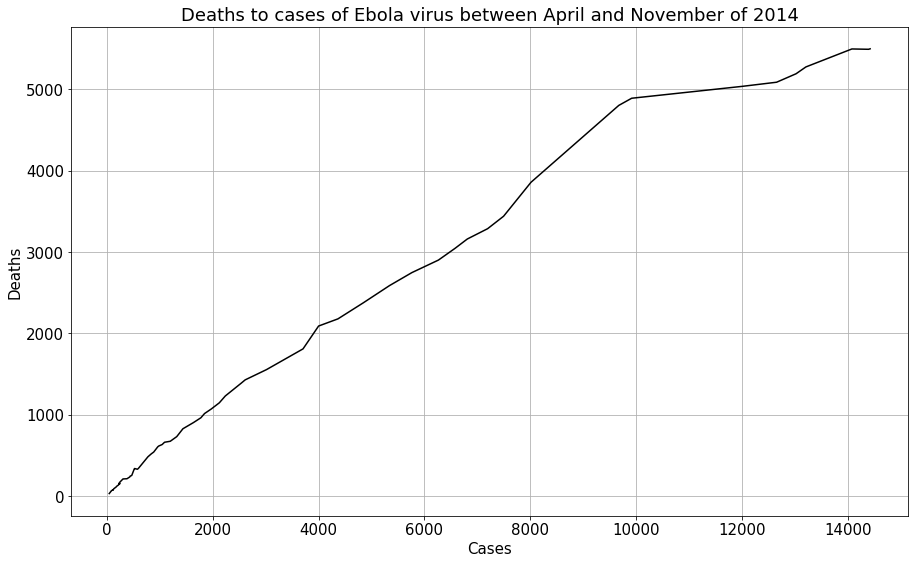

In [57]:
plt.figure(figsize = (15, 9))
plt.plot(xls_file["Cases"], xls_file["Death"], label = "Ratio", color = "black")
plt.xlabel("Cases")
plt.ylabel("Deaths")
plt.title("Deaths to cases of Ebola virus between April and November of 2014")
plt.grid(True)
plt.rcParams.update({'font.size': 15}) #setting font size to a larger one
plt.show()

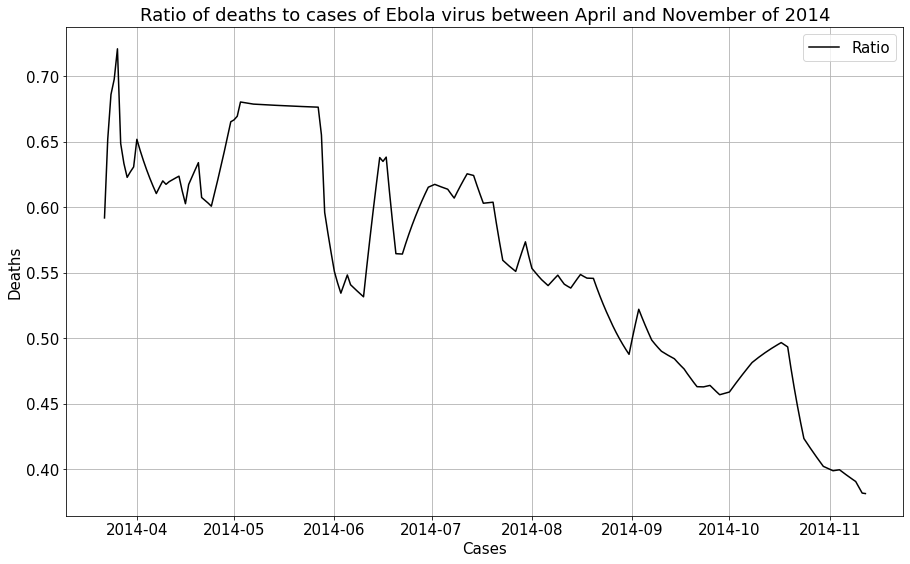

In [58]:
plt.figure(figsize = (15, 9))
plt.plot(xls_file.index, xls_file["Ratio"], label = "Ratio", color = "black")
plt.xlabel("Cases")
plt.ylabel("Deaths")
plt.title("Ratio of deaths to cases of Ebola virus between April and November of 2014")
plt.grid(True)
plt.legend()
plt.rcParams.update({'font.size': 15}) #setting font size to a larger one
plt.show()

In [59]:
ratio = {"Ratio of deaths to cases" : round(xls_file["Ratio"].mean(), 2)}

In [60]:
print(ratio)

{'Ratio of deaths to cases': 0.56}


<h3>Question 9</h3>

In [61]:
spy = pd.read_csv("spy.csv")
tlt = pd.read_csv("tlt.csv")

In [62]:
# setting the index to the date
spy = spy.set_index("Date")
tlt = tlt.set_index("Date")

In [63]:
# trimming the dataframe to only include the Adj Close column
spy = pd.DataFrame(spy["Adj Close"])
tlt = pd.DataFrame(tlt["Adj Close"])

In [64]:
# Normalizatin, as derived in the report. The lambda function is an inline function that allows me to calculate
# a certain equation inline instead of having to loop over each value. It takes the values in the dataframe, divides
# them by the initial number (scaling factor), then multiplies by 100 (the target valu)
normalized_spy = spy.apply(lambda x: (x / x.iloc[0]) * 100)
normalized_tlt = tlt.apply(lambda x: (x / x.iloc[0]) * 100)

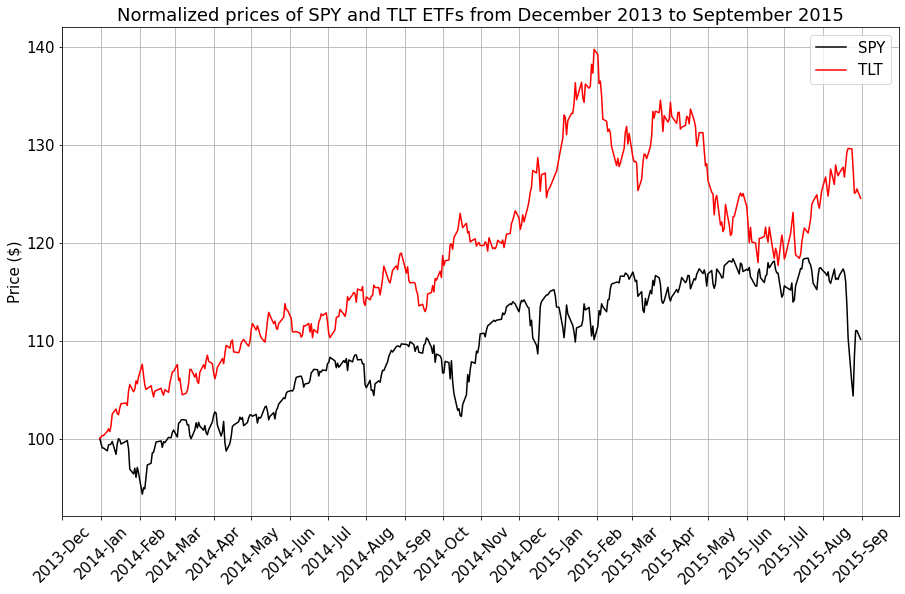

In [65]:
# Makes sure that the index is in datetime format, so I can properly populate it in the graph
normalized_spy.index = pd.to_datetime(normalized_spy.index)
normalized_tlt.index = pd.to_datetime(normalized_tlt.index)

import matplotlib.dates as mdates

graph = plt.figure(figsize = (15, 9))
plt.plot(normalized_spy.index, normalized_spy["Adj Close"], label = "SPY", color = "black")
plt.plot(normalized_tlt.index, normalized_tlt["Adj Close"], label = "TLT", color = "red")
plt.ylabel("Price ($)")
plt.title("Normalized prices of SPY and TLT ETFs from December 2013 to September 2015")
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
plt.xticks(rotation = 45)
plt.legend()
plt.rcParams.update({'font.size': 15}) #setting font size to a larger one
plt.show()

<h3>Question 10</h3>

In [66]:
# using pct_change to calculate the rate of change of the data pointss. rounded to the nearest one-hundredth
spy_change = round(normalized_spy["Adj Close"].pct_change() * 100, 2)
tlt_change = round(normalized_tlt["Adj Close"].pct_change() * 100, 2)

In [67]:
# Calculating mean, min, and max, and then adding them to a dictionary for better visibility
spy_mean_return = round(spy_change.mean(), 2)
spy_minimum_return = round(spy_change.min(), 2)
spy_maximum_return = round(spy_change.max(), 2)
spy_summary = {"% Mean Daily Return" : spy_mean_return, "% Minimum Daily Return" : spy_minimum_return, "% Maximum Daily Return" : spy_maximum_return}

In [68]:
# Calculating mean, min, and max, and then adding them to a dictionary for better visibility
tlt_mean_return = round(tlt_change.mean(), 2)
tlt_minimum_return = round(tlt_change.min(), 2)
tlt_maximum_return = round(tlt_change.max(), 2)
tlt_summary = {"% Mean Daily Return" : tlt_mean_return, "% Minimum Daily Return" :  tlt_minimum_return, "% Maximum Daily Return": tlt_maximum_return}

In [69]:
spy_summary

{'% Mean Daily Return': 0.03,
 '% Minimum Daily Return': -4.21,
 '% Maximum Daily Return': 3.84}

In [70]:
tlt_summary

{'% Mean Daily Return': 0.06,
 '% Minimum Daily Return': -2.43,
 '% Maximum Daily Return': 2.65}

In [71]:
import numpy as np
import tikzplotlib

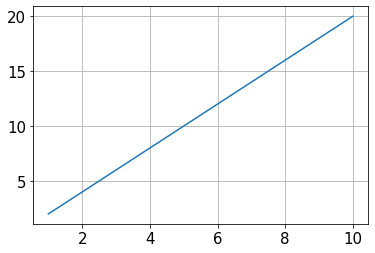

In [72]:
x = np.array(np.arange(1, 11, 1))
y = np.array(np.arange(2, 22, 2))
plt.plot(x , y)
plt.grid(True)
tikzplotlib.save("linear.tex")

In [1]:
import nasdaqdatalink as nas

In [8]:
aapl_nas = nas.get("WIKI/AAPL")

In [9]:
import yfinance as yf

In [11]:
pip install yahoo_finance

     |████████████████████████████████| 75 kB 2.6 MB/s eta 0:00:01
  Created wheel for yahoo-finance: filename=yahoo_finance-1.4.0-py3-none-any.whl size=7231 sha256=1f44c9bf43b2cf050665018f2091a92d4c36e3bccb3c5f81a350698286fcc2d8
  Stored in directory: /Users/anthonyrizkallah/Library/Caches/pip/wheels/8b/65/34/00416d116b8e8010472d9c8bf40b3cef1d07b2af8820d732f7
Successfully built yahoo-finance
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install yfinance--upgrade

ERROR: Could not find a version that satisfies the requirement yfinance--upgrade (from versions: none)
ERROR: No matching distribution found for yfinance--upgrade
Note: you may need to restart the kernel to use updated packages.
